___

<a href='http://www.pieriandata.com'> <img src='../Pierian_Data_Logo.png' /></a>
___
# Linear Regression - Project Exercise

Congratulations! You just got some contract work with an Ecommerce company based in New York City that sells clothing online but they also have in-store style and clothing advice sessions. Customers come in to the store, have sessions/meetings with a personal stylist, then they can go home and order either on a mobile app or website for the clothes they want.

The company is trying to decide whether to focus their efforts on their mobile app experience or their website. They've hired you on contract to help them figure it out! Let's get started!

Just follow the steps below to analyze the customer data (it's fake, don't worry I didn't give you real credit card numbers or emails).

## Imports
** Import pandas, numpy, matplotlib,and seaborn. Then set %matplotlib inline 
(You'll import sklearn as you need it.)**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Get the Data

We'll work with the Ecommerce Customers csv file from the company. It has Customer info, suchas Email, Address, and their color Avatar. Then it also has numerical value columns:

* Avg. Session Length: Average session of in-store style advice sessions.
* Time on App: Average time spent on App in minutes
* Time on Website: Average time spent on Website in minutes
* Length of Membership: How many years the customer has been a member. 

** Read in the Ecommerce Customers csv file as a DataFrame called customers.**

In [2]:
data = pd.read_csv('Ecommerce Customers')
df = pd.DataFrame(data)

**Check the head of customers, and check out its info() and describe() methods.**

In [3]:
df.head()

Email  \
0      mstephenson@fernandez.com   
1              hduke@hotmail.com   
2               pallen@yahoo.com   
3        riverarebecca@gmail.com   
4  mstephens@davidson-herman.com   

                                             Address            Avatar  \
0       835 Frank Tunnel\nWrightmouth, MI 82180-9605            Violet   
1     4547 Archer Common\nDiazchester, CA 06566-8576         DarkGreen   
2  24645 Valerie Unions Suite 582\nCobbborough, D...            Bisque   
3   1414 David Throughway\nPort Jason, OH 22070-1220       SaddleBrown   
4  14023 Rodriguez Passage\nPort Jacobville, PR 3...  MediumAquaMarine   

   Avg. Session Length  Time on App  Time on Website  Length of Membership  \
0            34.497268    12.655651        39.577668              4.082621   
1            31.926272    11.109461        37.268959              2.664034   
2            33.000915    11.330278        37.110597              4.104543   
3            34.305557    13.717514        36.721283              3.120179   
4            33.330673    12.795189        37.536653              4.446308   

   Yearly Amount Spent  
0           587.951054  
1           392.204933  
2           487.547505  
3           581.852344  
4           599.406092

In [4]:
df.describe()

Avg. Session Length  Time on App  Time on Website  \
count           500.000000   500.000000       500.000000   
mean             33.053194    12.052488        37.060445   
std               0.992563     0.994216         1.010489   
min              29.532429     8.508152        33.913847   
25%              32.341822    11.388153        36.349257   
50%              33.082008    11.983231        37.069367   
75%              33.711985    12.753850        37.716432   
max              36.139662    15.126994        40.005182   

       Length of Membership  Yearly Amount Spent  
count            500.000000           500.000000  
mean               3.533462           499.314038  
std                0.999278            79.314782  
min                0.269901           256.670582  
25%                2.930450           445.038277  
50%                3.533975           498.887875  
75%                4.126502           549.313828  
max                6.922689           765.518462

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 0 to 499
Data columns (total 8 columns):
Email                   500 non-null object
Address                 500 non-null object
Avatar                  500 non-null object
Avg. Session Length     500 non-null float64
Time on App             500 non-null float64
Time on Website         500 non-null float64
Length of Membership    500 non-null float64
Yearly Amount Spent     500 non-null float64
dtypes: float64(5), object(3)
memory usage: 35.2+ KB


## Exploratory Data Analysis

**Let's explore the data!**

For the rest of the exercise we'll only be using the numerical data of the csv file.
___
**Use seaborn to create a jointplot to compare the Time on Website and Yearly Amount Spent columns. Does the correlation make sense?**

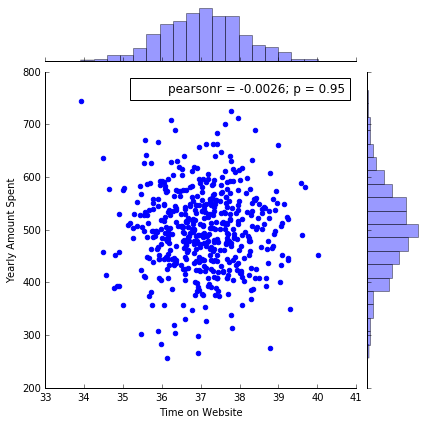

In [10]:
sns.jointplot(x='Time on Website',y='Yearly Amount Spent' ,data = df,kind='scatter')

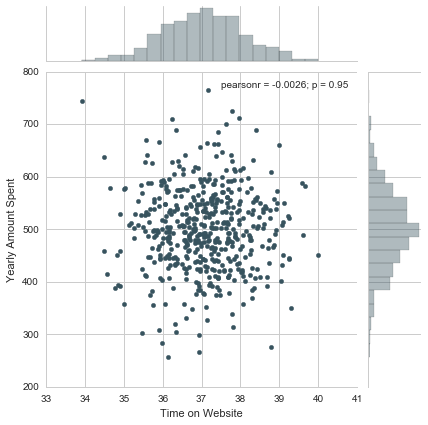

** Do the same but with the Time on App column instead. **

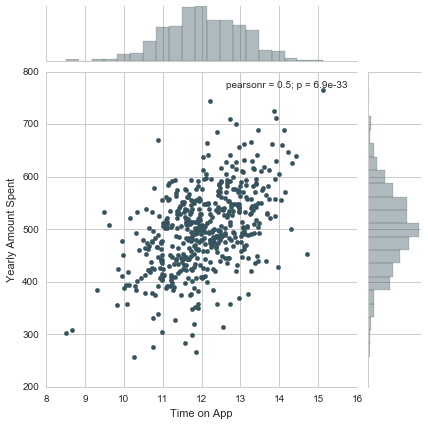

** Use jointplot to create a 2D hex bin plot comparing Time on App and Length of Membership.**

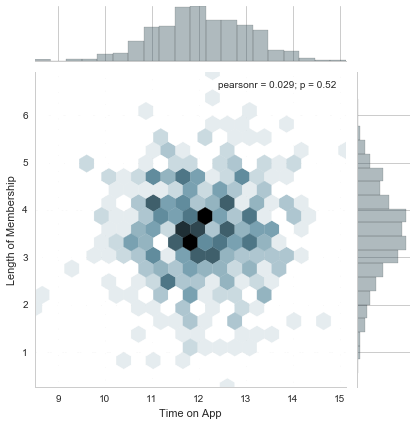

**Let's explore these types of relationships across the entire data set. Use [pairplot](https://stanford.edu/~mwaskom/software/seaborn/tutorial/axis_grids.html#plotting-pairwise-relationships-with-pairgrid-and-pairplot) to recreate the plot below.(Don't worry about the the colors)**

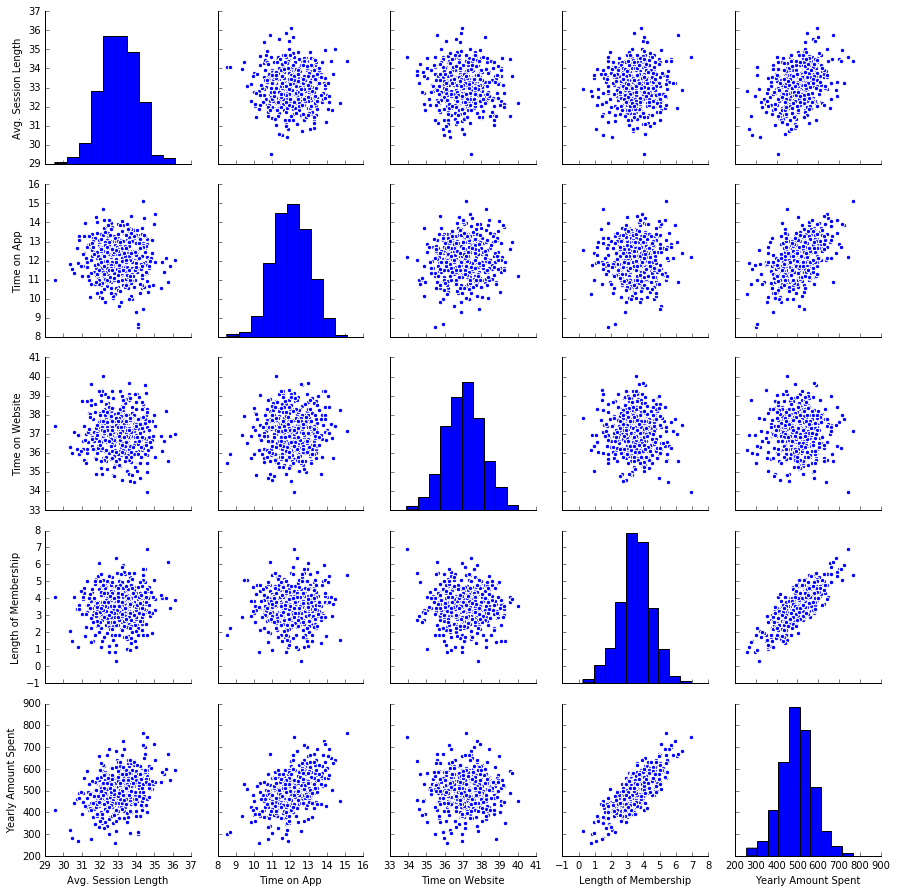

In [11]:
sns.pairplot(df)

**Based off this plot what looks to be the most correlated feature with Yearly Amount Spent?**

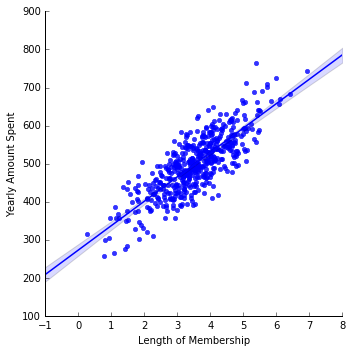

In [15]:
sns.lmplot(x = 'Length of Membership',y = 'Yearly Amount Spent',data = df)

**Create a linear model plot (using seaborn's lmplot) of  Yearly Amount Spent vs. Length of Membership. **

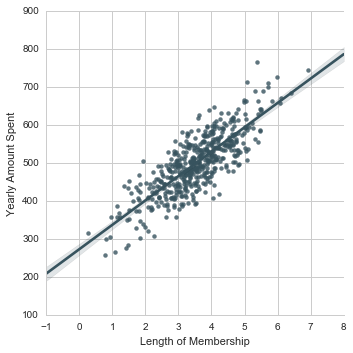

## Training and Testing Data

Now that we've explored the data a bit, let's go ahead and split the data into training and testing sets.
** Set a variable X equal to the numerical features of the customers and a variable y equal to the "Yearly Amount Spent" column. **

In [16]:
from sklearn.cross_validation import train_test_split

In [18]:
df.columns

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

In [20]:
X = df[['Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership']]

In [21]:
y = df['Yearly Amount Spent']

In [22]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = .4,random_state=101)

In [26]:
X_train

Avg. Session Length  Time on App  Time on Website  Length of Membership
269            34.318927    13.402332        37.292045              3.606087
181            34.142863    13.177775        38.856042              3.230974
444            31.268104    12.132509        35.456798              3.072076
287            33.908565    12.914847        39.068864              1.482360
60             33.879784    12.495592        38.052610              4.639320
231            34.173752    12.144749        37.258031              3.397363
218            32.530829    12.354607        37.122345              2.307552
325            33.785207    13.039511        36.312727              2.018195
134            33.540977    11.851891        37.424548              1.767731
341            34.461515    11.917116        37.766687              4.350888
372            31.829346    11.268259        36.956965              2.668920
304            33.914015    12.266504        36.575031              3.023474
102            32.425697    11.448902        37.580190              2.586968
268            31.600512    12.222967        36.822753              3.414506
308            32.644617    12.637557        36.517086              5.226688
365            32.030550    12.644202        38.001827              5.038107
209            32.559493    11.797796        37.777366              3.195626
363            34.179518    12.581548        35.444265              3.137069
410            33.265444    13.052210        38.775665              4.574288
29             33.105438    11.965020        37.277812              4.742578
417            32.215527    12.216855        36.953960              2.910531
387            33.637812    12.039502        34.487185              2.739200
158            33.598520    11.586320        39.094627              3.604399
210            31.765619    12.442617        38.131712              3.850280
240            32.922611    11.568116        36.909378              2.471751
171            31.864833    13.443406        36.878315              2.361087
336            32.302553    11.979061        38.269061              3.532862
33             32.728360    13.104507        38.878041              2.820097
472            33.665990    12.263718        38.860234              3.139527
74             33.879745    13.587806        38.260353              3.258113
..                   ...          ...              ...                   ...
59             33.754995    12.064157        37.271222              3.970556
473            31.609840    12.710701        36.166463              2.562819
413            32.592093    10.314718        36.729029              4.791109
371            32.404295    11.608998        38.110457              2.966559
136            32.686129    12.215252        36.594362              3.897116
111            32.012301    12.178331        37.715986              3.722561
339            32.997459    12.589241        37.332241              2.804014
49             31.661050    11.398064        36.594457              3.198399
490            34.695591    11.608997        37.684877              3.163092
477            31.061325    12.357638        36.166042              4.089331
396            35.742670    10.889828        35.565436              6.115199
5              33.871038    12.026925        34.476878              5.493507
110            31.853075    12.149375        37.325334              3.361815
192            33.694898    11.202670        35.493964              4.015987
220            34.117567    11.591872        37.743620              3.678589
316            33.566474    12.235659        37.277573              2.532044
245            32.980029    11.201160        37.689337              2.412831
424            34.370327    11.887800        37.861447              3.046620
495            33.237660    13.566160        36.417985              3.746573
132            34.312167    11.810587        37.414134              2.473596
4

** Use model_selection.train_test_split from sklearn to split the data into training and testing sets. Set test_size=0.3 and random_state=101**

## Training the Model

Now its time to train our model on our training data!

** Import LinearRegression from sklearn.linear_model **

In [27]:
from sklearn.linear_model import LinearRegression

In [28]:
lm = LinearRegression()

**Create an instance of a LinearRegression() model named lm.**

** Train/fit lm on the training data.**

In [30]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [31]:
lm.coef_

array([ 25.69154034,  37.89259966,   0.56058149,  61.64859402])

**Print out the coefficients of the model**

In [294]:
lm.coef

Coefficients: 
 [ 25.98154972  38.59015875   0.19040528  61.27909654]


## Predicting Test Data
Now that we have fit our model, let's evaluate its performance by predicting off the test values!

** Use lm.predict() to predict off the X_test set of the data.**

In [34]:
predictions = lm.predict(X_test)

In [33]:
y_test

18     452.315675
361    401.033135
104    410.069611
4      599.406092
156    586.155870
350    535.480775
32     588.712606
205    712.396327
81     462.897636
414    532.724805
489    327.377953
474    492.556834
95     543.340166
355    403.766902
65     765.518462
39     537.846195
368    708.935185
236    501.928265
318    564.790969
435    571.216005
12     408.640351
211    548.518529
289    467.427849
243    490.600443
241    571.471034
382    410.602944
457    534.771485
320    368.654785
64     540.263400
335    443.441860
          ...    
348    392.810345
16     457.847696
183    452.122625
426    530.766719
41     501.874430
427    581.798798
377    538.941975
322    478.262126
213    558.427257
296    506.423860
323    473.360496
416    511.038786
169    501.749233
265    567.475011
314    610.128033
344    442.722892
45     549.860590
153    657.019924
70     444.966552
274    446.418673
148    424.185494
112    424.762636
354    508.771907
90     449.070319
471    541

** Create a scatterplot of the real test values versus the predicted values. **

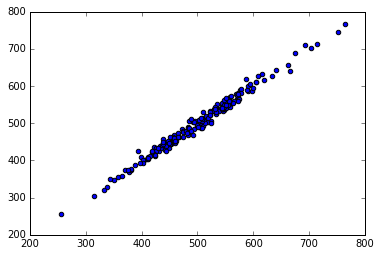

In [36]:
plt.scatter(predictions,y_test)

18     -2.061563
361    -3.706075
104    -0.589925
4       8.211024
156    -4.327283
350   -12.882518
32     12.149539
205    -1.935979
81    -10.491246
414   -13.480239
489   -10.436286
474    -6.077107
95     -9.458341
355    -5.620087
65      1.953943
39     -7.678516
368    16.189274
236    -5.056930
318    -6.833314
435    -0.690287
12      9.236507
211    -5.886915
289    10.380949
243     7.745409
241    12.733006
382    -3.552614
457     3.345297
320    -7.967164
64      6.362199
335    -5.523294
         ...    
348    -4.359126
16     20.086561
183    -6.904910
426    -3.204197
41    -11.751291
427     3.921889
377     7.481607
322   -10.104381
213     2.163142
296    -1.864559
323    -7.153899
416     3.068907
169   -22.783460
265    16.043641
314     6.116232
344     6.639912
45     -1.749420
153    -5.237518
70      7.095038
274    -2.878354
148    30.158195
112   -19.436605
354     5.602961
90     10.739772
471    -2.508853
464    13.904584
78    -11.472217
160   -23.4801

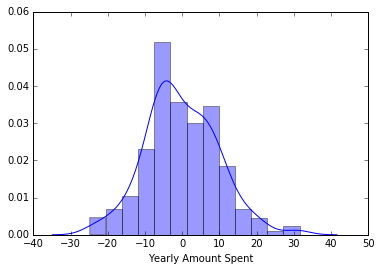

In [39]:
sns.distplot((y_test-predictions))
y_test-predictions

## Evaluating the Model

Let's evaluate our model performance by calculating the residual sum of squares and the explained variance score (R^2).

** Calculate the Mean Absolute Error, Mean Squared Error, and the Root Mean Squared Error. Refer to the lecture or to Wikipedia for the formulas**

In [41]:
from sklearn import metrics
print('MAE:',metrics.mean_absolute_error(y_test,predictions))
print('MSE:',metrics.mean_squared_error(y_test,predictions))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,predictions)))



MAE: 7.74267128584
MSE: 93.8329780082
RMSE: 9.6867423837


## Residuals

You should have gotten a very good model with a good fit. Let's quickly explore the residuals to make sure everything was okay with our data. 

**Plot a histogram of the residuals and make sure it looks normally distributed. Use either seaborn distplot, or just plt.hist().**

TypeError: len() of unsized object

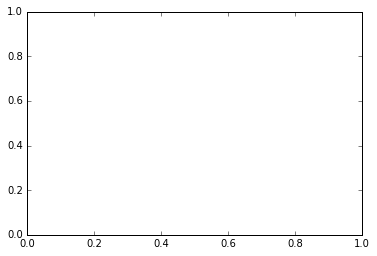

In [44]:
plt.hist(x='Yearly Amount Spent')

## Conclusion
We still want to figure out the answer to the original question, do we focus our efforst on mobile app or website development? Or maybe that doesn't even really matter, and Membership Time is what is really important.  Let's see if we can interpret the coefficients at all to get an idea.

** Recreate the dataframe below. **

In [42]:
cdf = pd.DataFrame(lm.coef_,X.columns,columns = ['Coeff'])
cdf

Coeff
Avg. Session Length   25.691540
Time on App           37.892600
Time on Website        0.560581
Length of Membership  61.648594

** How can you interpret these coefficients? **

**Do you think the company should focus more on their mobile app or on their website?**


*Answer here*

## Great Job!

Congrats on your contract work! The company loved the insights! Let's move on.